# Heatmaps

In [1]:
import sympy
from numpy.random import randint as ri
from ToolsForQuasiCord import *

sympy.init_printing()
import itertools

import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
from tqdm.notebook import tqdm

## Fixing $T-L$ and $R$, changing $B$ and $L$

In [5]:
def map_maker_fix_er(e, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        r = 1 + i * Col + j
        try:
            df = pd.read_csv(f"data/fix_T-L_R/T-L={e}_R={r}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(
        height=320 * Row, width=250 * Col, title=f"T-L={e}, L: horizontal, B: vertical"
    )
    return fig
#---
map_maker_fix_er(7, 50).show()

### The area of $L < B+R$

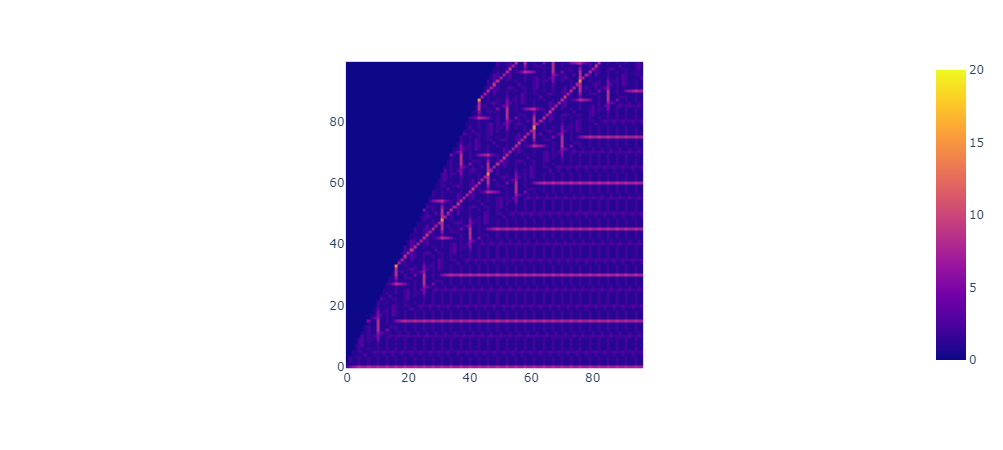

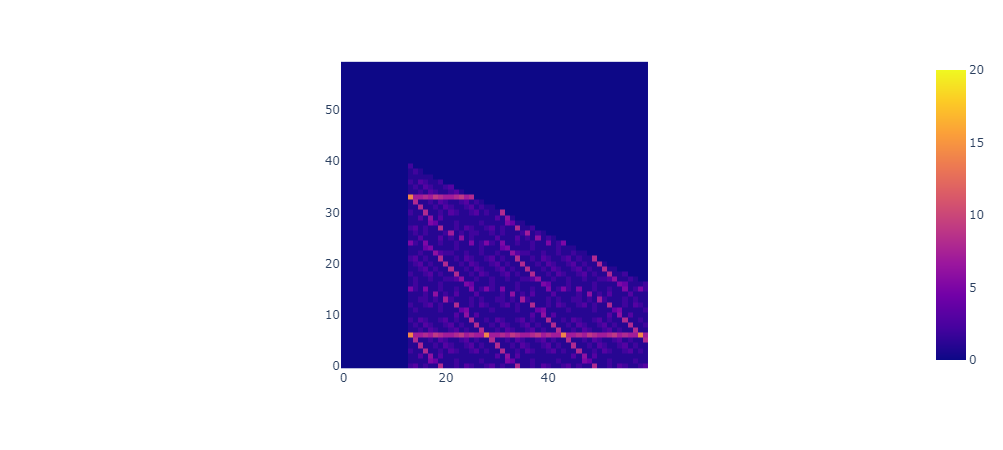

In [80]:
e, r = 2, 7
size = 60
# ---
df = pd.read_csv(f"data/fix_T-L_R/T-L={e}_R={r}_100x100.csv")
dfvt = df.values
shift = int((r - e) / 2) + (r - e) % 2 if r - e >= 0 else 0
px.imshow(dfvt[: size * 2, shift : size * 2 + shift], origin="lower", zmax=20).show()
# ---
mat = []
for i in range(size):
    seq = []
    for j in range(size):
        try:
            seq += [dfvt[r + 1 + i + j + i][j + i]]
        except:
            seq += [0]
    mat += [seq]
# ---
px.imshow(mat, origin="lower", zmax=20).show()

## Fixing $T-L$ and $B$, changing $L$ and $R$

In [8]:
def map_maker_fix_eb(e, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=["B={}".format(v) for v in range(1, Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        b = 1 + i * Col + j
        try:
            df = pd.read_csv(f"data/fix_T-L_B/T-L={e}_B={b}_100x100.csv")
            mat = np.transpose(df.values[:size, :size])
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(
        height=320 * Row, width=250 * Col, title=f"T-L={e}, T: horixontal, R: vertical"
    )
    return fig
#---
map_maker_fix_eb(7, 50).show()

### The area of $T < B+R$

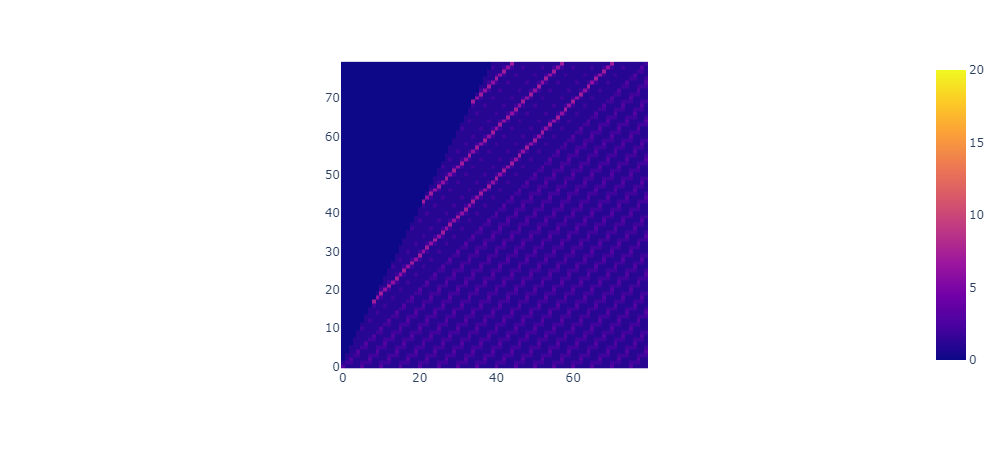

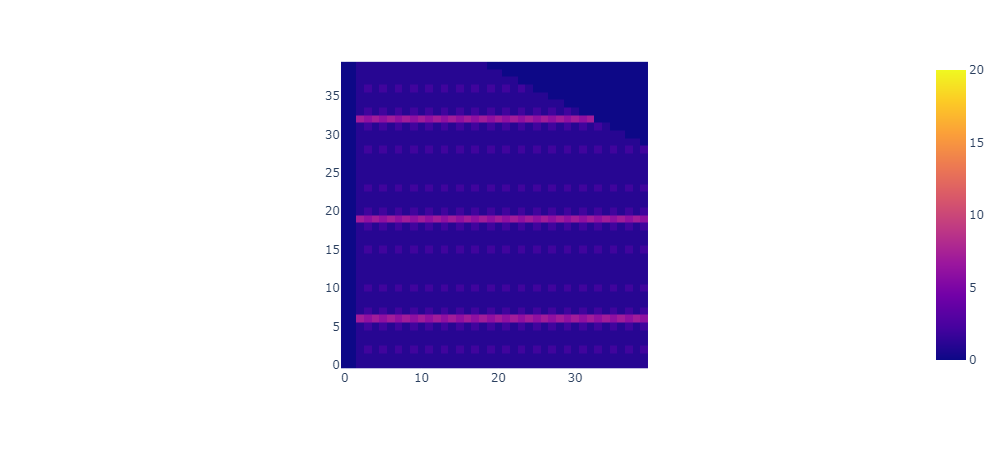

In [82]:
e, b = 3, 2
size = 40
# ---
df = pd.read_csv(f"data/fix_T-L_B/T-L={e}_B={b}_100x100.csv")
dfvt = np.transpose(df.values)
shift = int((b - e) / 2) + (b - e) % 2 if b - e >= 0 else 0
px.imshow(dfvt[: size * 2, shift : size * 2 + shift], origin="lower", zmax=20).show()
# ---
mat = []
for i in range(size):
    seq = []
    for j in range(size):
        try:
            seq += [dfvt[b + 1 + i + j + i][j + i]]
        except:
            seq += [0]
    mat += [seq]
# ---
px.imshow(mat, origin="lower", zmax=20).show()

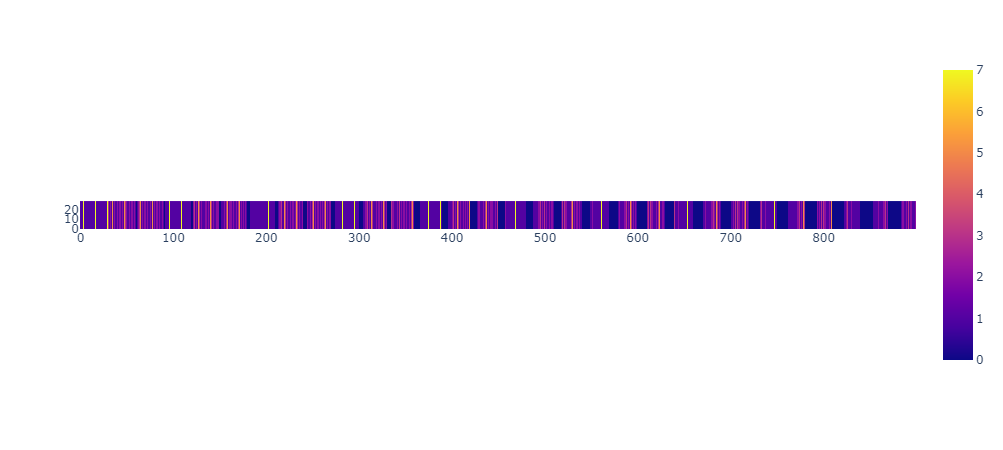

In [18]:
e, b = 7, 3
size = 30
# ---
df = pd.read_csv(f"data/fix_T-L_B/T-L={e}_B={b}_100x100.csv")
dfvt = np.transpose(df.values)
# ---
seq, mat = [], []
for i in range(size):
    for j in range(size):
        seq += [dfvt[b + i][j]]
    mat += [seq]
# ---
px.imshow(mat, origin="lower")

## $T-L=R+1$ series

$[L+R+1,L,B,R],~ (1 \leq R \leq L)$

__予想:__  
* $|L+R+1,L,B,R|=|L+R+1,L,1,R|$
* $L_{n} = (R+1)+(2R+1)n$ として、$|L_{n}+R+1,L_{n},1,R|=R+1,~~ \forall n \in \mathbb{N}$ 

In [ ]:
def map_maker_01(delta=1, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        r = 1 + i * Col + j
        df = pd.read_csv(f"data/T-L={delta}_R={r}_100x100.csv")
        mat = df.values[:size, :size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    # ---
    fig.update_layout(
        height=380 * Row, width=300 * Col, title="T>L>R, T-L={}".format(delta)
    )
    return fig

In [ ]:
size = 30
Row, Col = 5, 3
fig = make_subplots(
    Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
)
# ---
for i, j in tqdm(itertools.product(range(Row), range(Col)), total=Row * Col):
    r = 1 + i * Col + j
    d = r + 1
    try:
        df = pd.read_csv(f"data/fix_T-L_R/T-L={d}_R={r}_100x100.csv")
        mat = df.values[:size, :size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    except:
        pass
# ---
fig.update_layout(height=320 * Row, width=240 * Col, title="T>L>R, T-L=R+1")
fig.show()

In [ ]:
N = 16
size = 50
# ---
mat = []
ylabel = []
for r in range(N + 1):
    try:
        df = pd.read_csv(f"data/fix_T-L_R/T-L={r+1}_R={r}_100x100.csv")
        b = 1
        mat += [df.values[b, :size]]
        ylabel += [f"R={r}"]
    except:
        pass
# ---
display(sympy.Matrix(mat))
fig = px.imshow(mat, y=ylabel, aspect="equal")
# ---
fig.update_layout(
    height=24 * len(ylabel), width=960, title=f"T>L>R, |L+R+1, L, {b}, R|"
)
fig.show()

In [ ]:
for r in range(1, 17):
    seq = []
    try:
        for n in range(50):
            seq += [mat[r - 1][((r + 1) + (2 * r + 1) * n) - 1]]
    except:
        pass
    print(seq)

In [ ]:
mtx = []
for r in range(1, 17):
    seq = []
    try:
        for n in range(50):
            seq += [mat[r - 1][((1 + 1) + (2 * 1 + 1) * n) - 1]]
    except:
        pass
    mtx += [seq]
display(sympy.Matrix(mtx))
px.imshow(mtx)

## $T-L=R+e$ series

  0%|          | 0/16 [00:00<?, ?it/s]

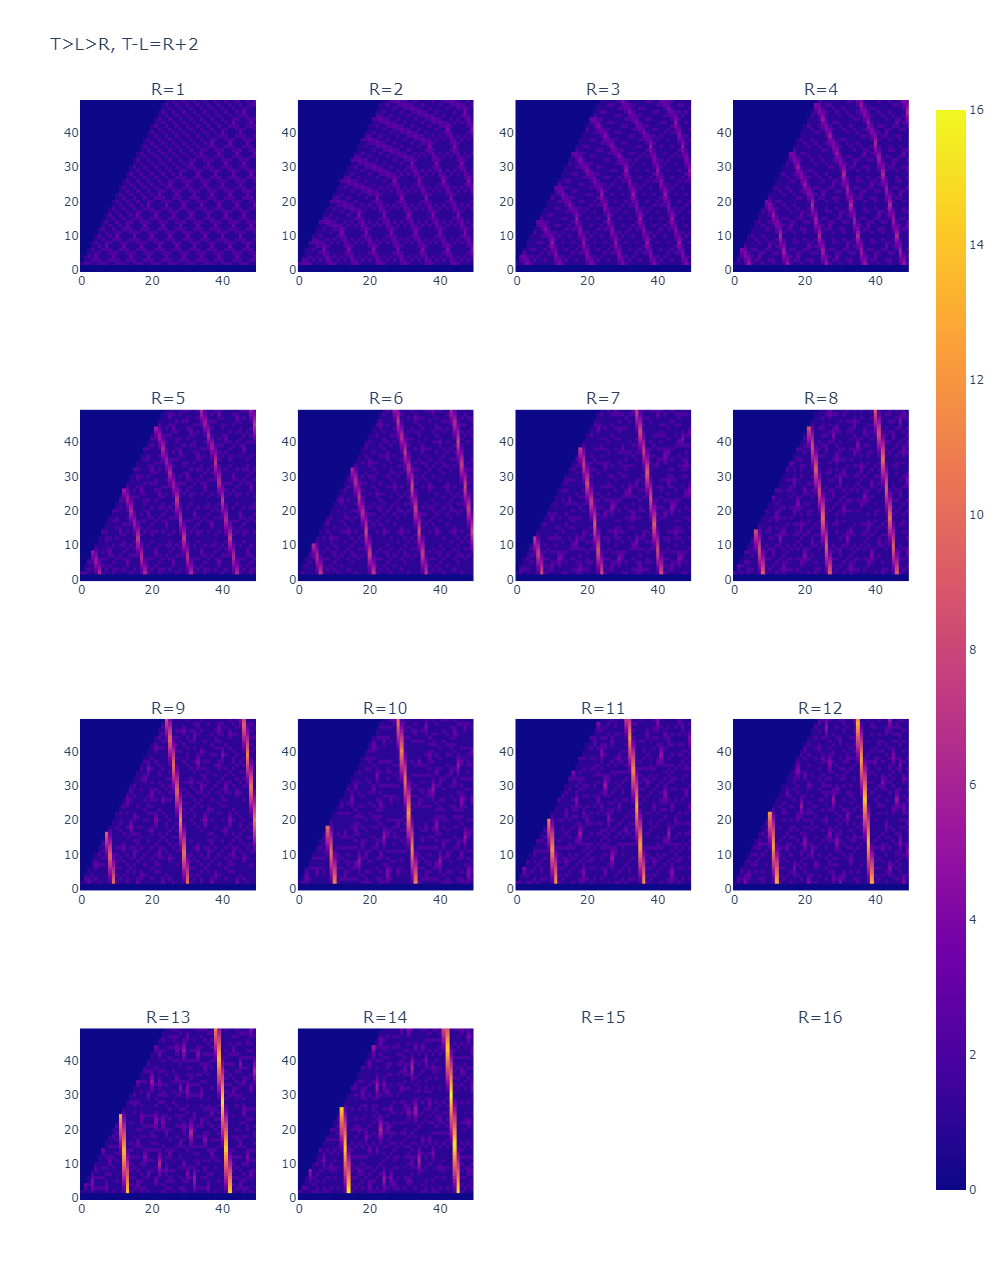

In [102]:
e = 2
size = 50
Row, Col = 4, 4
fig = make_subplots(
    Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
)
# ---
for i, j in tqdm(itertools.product(range(Row), range(Col)), total=Row * Col):
    r = 1 + i * Col + j
    d = r + e
    try:
        df = pd.read_csv(f"data/fix_T-L_R/T-L={d}_R={r}_100x100.csv")
        mat = df.values[:size, :size]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    except:
        pass
# ---
fig.update_layout(height=320 * Row, width=240 * Col, title=f"T>L>R, T-L=R+{e}")
fig.show()

## $T=L+e$ series

$[L+e,L,B,R],~~(L \geq B+R)$

__予想01:__ 
* $|L,L,B,R| = |L+1,L,B,R| = |B+R,B+R,B,R|,~ (L \geq B + R)$

  0%|          | 0/16 [00:00<?, ?it/s]

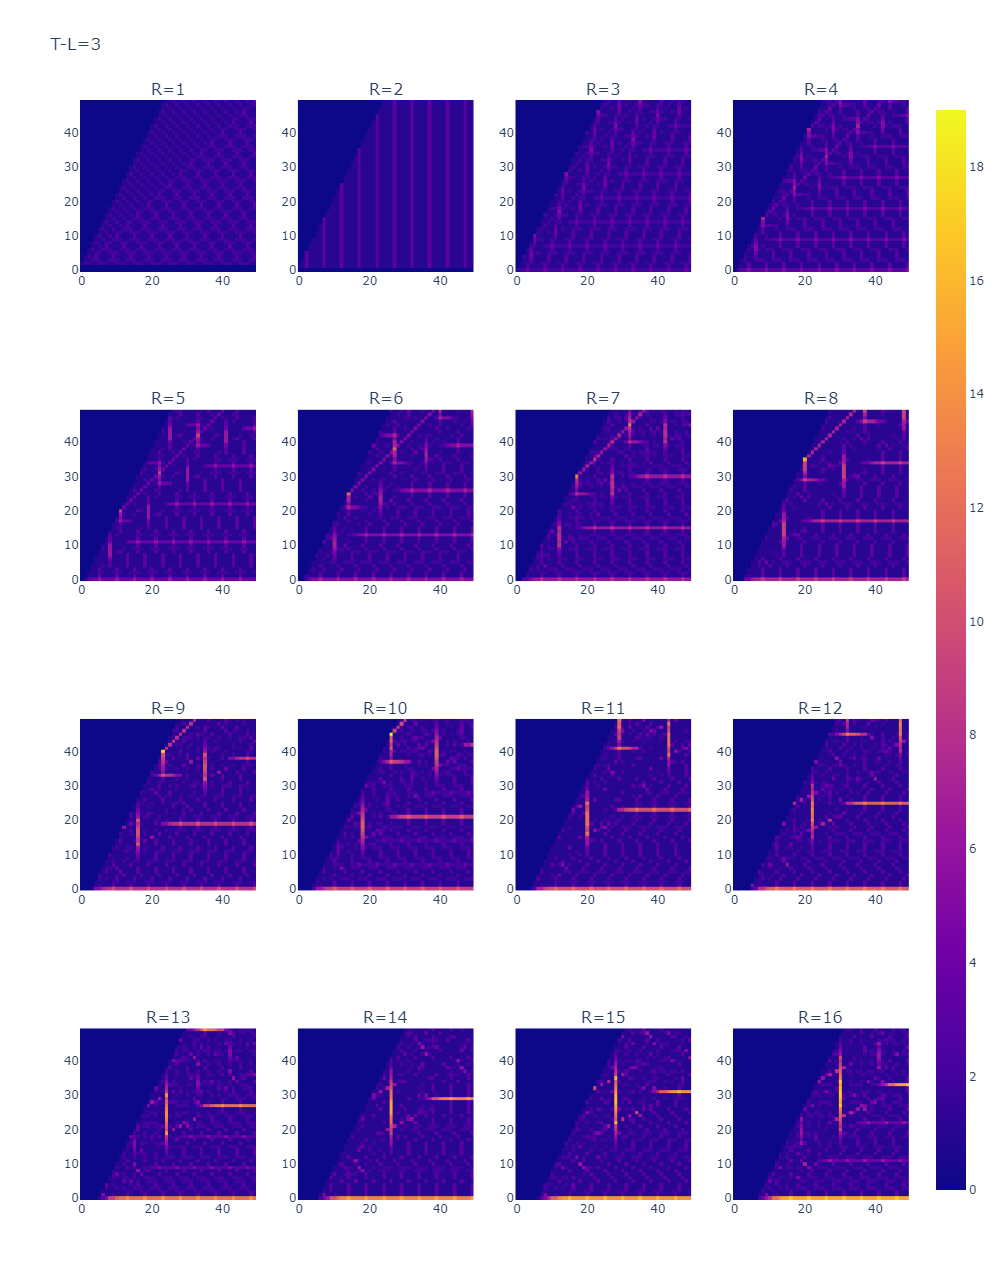

In [44]:
e = 3
size = 50
Row, Col = 4, 4
fig = make_subplots(
    Row, Col, subplot_titles=["R={}".format(v) for v in range(1, Row * Col + 1)]
)
# ---
for i, j in tqdm(itertools.product(range(Row), range(Col)), total=Row * Col):
    r = 1 + i * Col + j
    mat = []
    try:
        df = pd.read_csv(f"data/fix_T-L_R/T-L={e}_R={r}_100x100.csv")
        for b in range(size):
            s = 0  # b+r  #int((b+r)/2) + ((b+r)%2)  #
            try:
                mat += [df.values[b, s : size + s]]
            except:
                pass
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    except:
        pass
# ---
fig.update_layout(height=320 * Row, width=240 * Col, title=f"T-L={e}")
fig.show()

### $[B+R,B+R,B,R]$

__予想02:__
* $|B+R,B+R,B,R| = |B+2R+1,B+R,1,R|$

In [ ]:
e = 0
N = 16
size = 50
# ---
mat, ylabel = [], []
for r in range(1, N + 1):
    try:
        df = pd.read_csv(f"data/fix_T-L_R/T-L={e}_R={r}_100x100.csv")
        # ---
        mat += [[df.values[b, b + r] for b in range(size)]]
        ylabel += [f"R={r}"]
    except:
        pass
# ---
fig = px.imshow(mat, y=ylabel, aspect="equal")
fig.update_layout(height=24 * len(ylabel), width=960, title=f"|B+R+{e},B+R,B,R|")
fig.show()

## Fixing $B$ and $R$, changing $T$ and $L$

### fix B

In [1]:
def map_maker_fix_b(b, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=[f"R={v}" for v in range(Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        r = i * Col + j
        try:
            df = pd.read_csv(f"data/fix_BR/B={b}_R={r}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(height=320 * Row, width=250 * Col, title=f"B={b}")
    return fig
#---
map_maker_fix_b(3, 50, 4, 4).show()    

NameError: name 'make_subplots' is not defined

### fix R

In [70]:
def map_maker_fix_r(r, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=[f"B={v}" for v in range(Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        b = i * Col + j
        try:
            df = pd.read_csv(f"data/fix_BR/B={b}_R={r}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(height=320 * Row, width=250 * Col, title=f"R={r}")
    return fig
#---
map_maker_fix_r(2, 50).show()

### fix B-R

In [92]:
def map_maker_fix_diff(d, size=20, Row=4, Col=4):
    shift = max(0, d)
    fig = make_subplots(
        Row,
        Col,
        subplot_titles=[f"B={v},R={v-d}" for v in range(shift, Row * Col + 1 + shift)],
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        b = i * Col + j + shift
        try:
            df = pd.read_csv(f"data/fix_BR/B={b}_R={b-d}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(height=320 * Row, width=250 * Col, title=f"B-R={d}")
    return fig
#---
map_maker_fix_diff(4, 50).show()

## Fixing $T$ and $L$, changing $B$ and $R$

### fix T

In [4]:
def map_maker_fix_t(t, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=[f"L={v}" for v in range(Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        l = i * Col + j
        try:
            df = pd.read_csv(f"data/fix_TL/T={t}_L={l}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(height=320 * Row, width=250 * Col, title=f"T={t}")
    return fig
#---
map_maker_fix_t(16, 40, 4, 4).show()

### fix L

In [18]:
def map_maker_fix_l(l, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=[f"T={v}" for v in range(Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        t = i * Col + j
        try:
            df = pd.read_csv(f"data/fix_TL/T={t}_L={l}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(height=320 * Row, width=250 * Col, title=f"L={l}")
    return fig
#---
map_maker_fix_l(16, 40, 4, 4).show()

### T=L

In [7]:
def map_maker_t_eq_l(size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=[f"T=L={v}" for v in range(Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        t = i * Col + j
        try:
            df = pd.read_csv(f"data/fix_TL/T={t}_L={t}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(height=320 * Row, width=250 * Col, title=f"T=L")
    return fig
#---
map_maker_t_eq_l(30, 8, 4).show()

## Fixing $T+L$ and $R$, changing $T$ and $B$

In [23]:
def map_maker_fix_sum_r(s, size=20, Row=4, Col=4):
    shift = 0  # max(0, d)
    fig = make_subplots(
        Row,
        Col,
        subplot_titles=[f"R={v}" for v in range(shift, Row * Col + 1 + shift)],
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        r = i * Col + j + shift
        try:
            df = pd.read_csv(f"data/fix_Sum_R/Sum={s}_R={r}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(height=320 * Row, width=250 * Col, title=f"T+L={s}")
    return fig
#---
s = 0
map_maker_fix_sum_r(s, s + 1).show()

In [54]:
def map_maker_fix_r_sum(r, size=20, Row=4, Col=4):
    shift = r
    fig = make_subplots(
        Row,
        Col,
        subplot_titles=[f"T+L={v}" for v in range(shift, Row * Col + 1 + shift)],
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        s = i * Col + j + shift
        try:
            df = pd.read_csv(f"data/fix_Sum_R/Sum={s}_R={r}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(height=320 * Row, width=250 * Col, title=f"R={r}")
    return fig
#---
r = 5
map_maker_fix_r_sum(r, 50, 8, 4).show()

## Fixing $T$ and $B$, changing $L$ and $R$

### fix T

In [35]:
def map_maker_fix_t(t, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=[f"B={v}" for v in range(Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        b = i * Col + j
        try:
            df = pd.read_csv(f"data/fix_TB/T={t}_B={b}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(
        height=320 * Row, width=250 * Col, title=f"T={t}, L: vertical, R: horixontal"
    )
    return fig
#---
map_maker_fix_t(6, 20, 4, 4).show()

### fix B

In [67]:
def map_maker_fix_b(b, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=[f"T={v}" for v in range(Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        t = i * Col + j
        try:
            df = pd.read_csv(f"data/fix_TB/T={t}_B={b}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat, zmax = 20).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(
        height=320 * Row, width=250 * Col, title=f"B={b}, L: vertical, R: horixontal"
    )
    return fig
#---
map_maker_fix_b(3, 30, 4, 4).show()

## $L=R + \text{shift}$

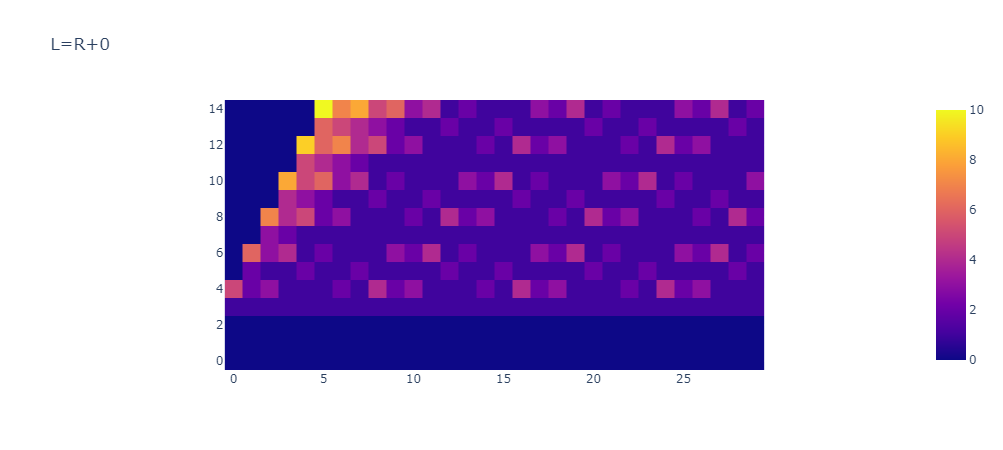

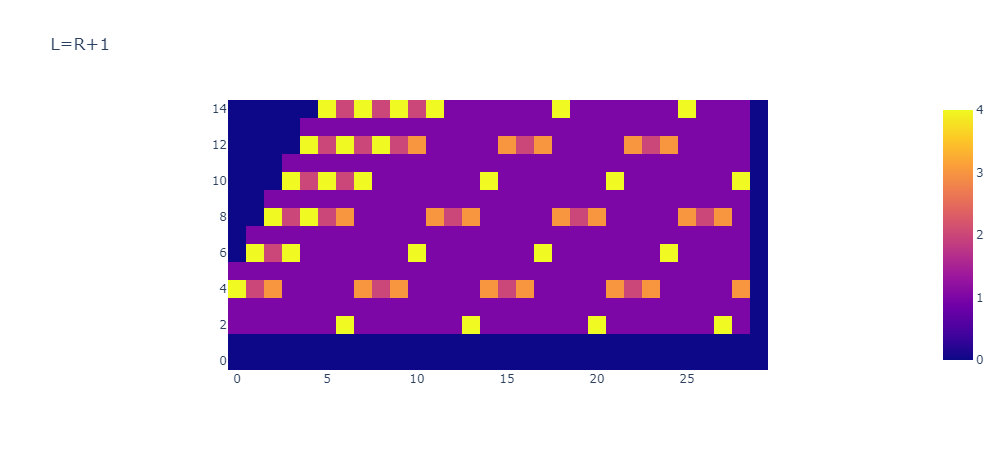

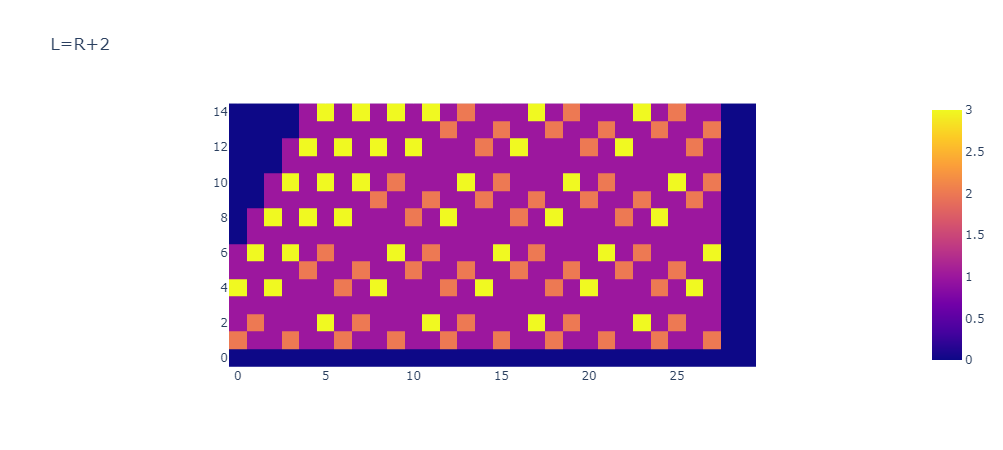

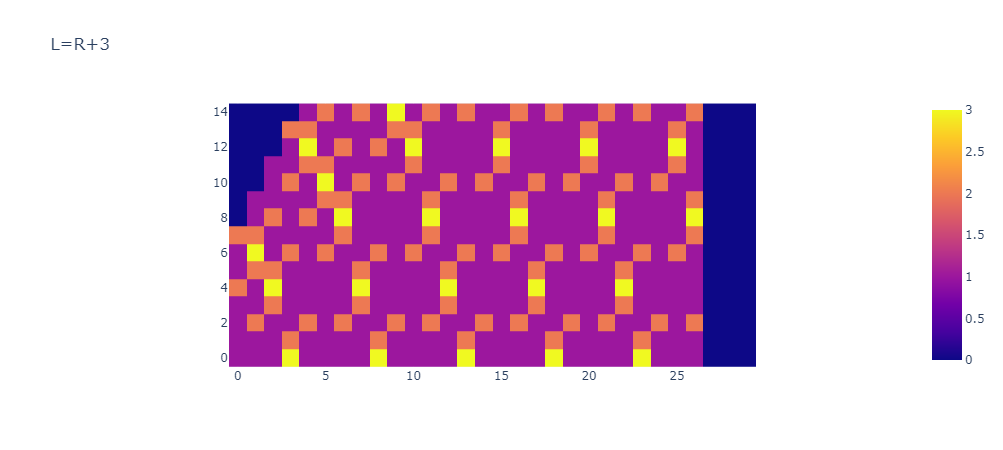

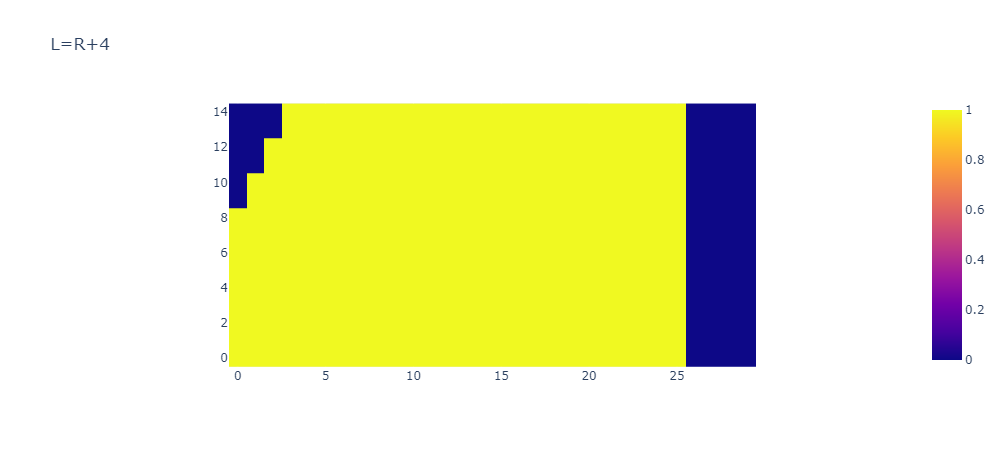

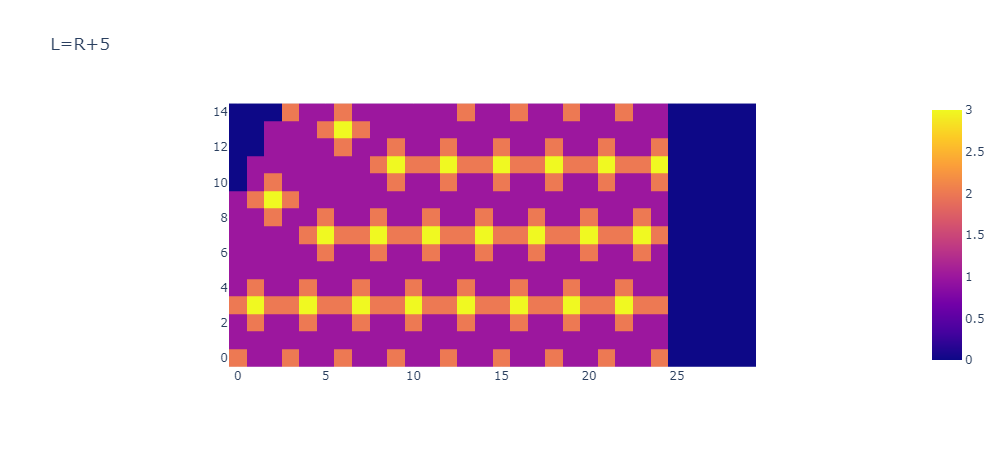

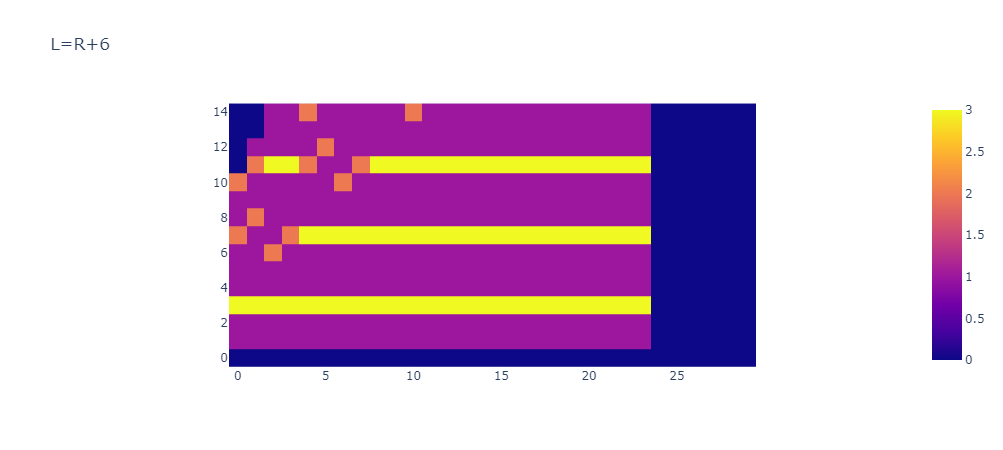

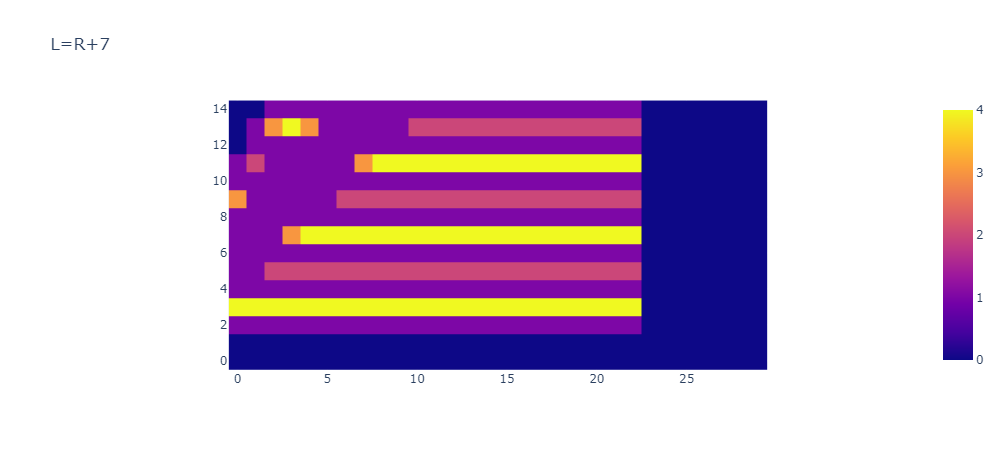

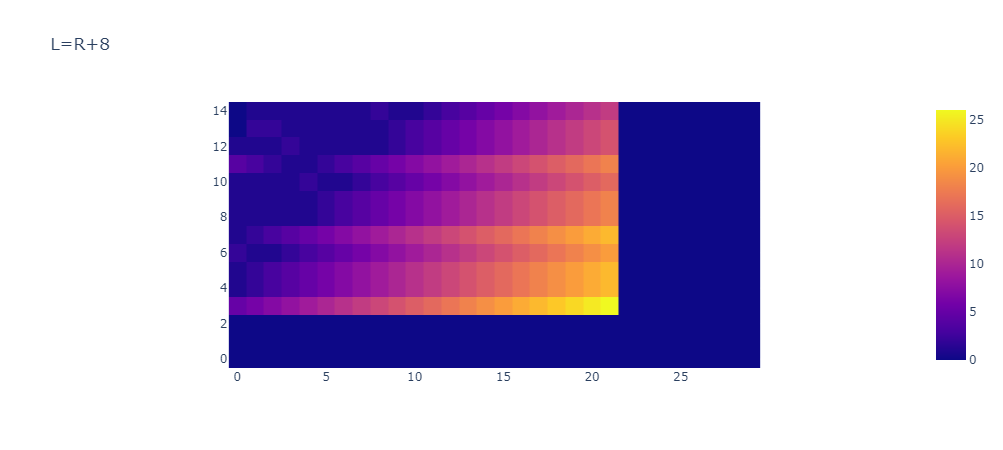

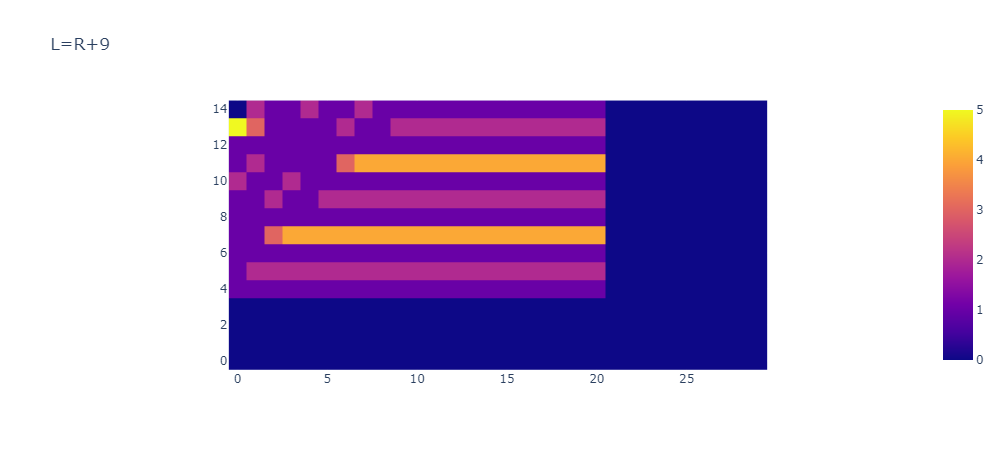

In [137]:
b = 4
size = 30
# ---
for shift in range(10):
    mat = []
    for t in range(1, 16):
        seq = []
        try:
            df = pd.read_csv(f"data/fix_TB/T={t}_B={b}_100x100.csv")
            dfv = df.values[:size, :size]
        except:
            dfv = np.zeros((size,size), dtype = int)
        for j in range(len(dfv)):
            try:
                seq += [dfv[j+shift,j]]
            except: 
                seq += [0]
        mat += [seq]
    # ---
    px.imshow(mat, origin='lower', title=f"L=R+{shift}").show()

## Fixing $L-R$ and $B$, changing $T$ and $R$

In [126]:
def map_maker_fix_fb(f, size=20, Row=4, Col=4):
    fig = make_subplots(
        Row, Col, subplot_titles=["B={}".format(v) for v in range(1, Row * Col + 1)]
    )
    # ---
    for i, j in itertools.product(range(Row), range(Col)):
        b = 1 + i * Col + j
        try:
            df = pd.read_csv(f"data/fix_L-R_B/L-R={f}_B={b}_100x100.csv")
            mat = df.values[:size, :size]
            fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
        except:
            pass
    # ---
    fig.update_layout(
        height=320 * Row, width=250 * Col, title=f"L-R={f}, T: vertical, R: horizontal"
    )
    return fig
#---
map_maker_fix_fb(2, 20, 1, 3).show()